In [6]:
import numpy as np
import math
from PIL import Image               
from IPython.display import display # to display images
pil_im = Image.open('red1.png')


# Backpropagation Algorithm 
Programming the backpropagation algorithm of the network showed bellow. Then, the network learns the XOR problem to show that the algorithm worked. 


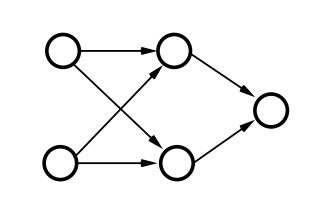

In [7]:
display(pil_im)

In [8]:
def g(x):
    return math.tanh(x)     #Activation Function
        
P=[[1,1],[-1,-1],[-1,1],[1,-1]] # Input 
S=[[1],[-1]] #Expected outputs

In [15]:
eta=0.008
def prop(Patrones,W11,W12,W21,W22,W31,W41,b1,b2,b3):
	DJ41=0
	DJ31=0
	Db3=0
	Db2=0
	Db1=0
	DJ11=0
	DJ21=0
	DJ12=0
	DJ22=0
	E=0
	S1=[]
	
	for P in Patrones[0:2]:
		output=1
		V1=g(P[0]*W11+P[1]*W21+b1)
		V2=g(P[0]*W12+P[1]*W22+b2)
		S=g(V1*W31+V2*W41+b3)
		E+=(S-output)*(S-output)
		d5=(output-S)*(1-g(V1*W31+V2*W41+b3)*g(V1*W31+V2*W41+b3))
		d3=(1-V1*V1)*d5*W31
		d4=(1-V2*V2)*d5*W41
		
		DJ41+=eta*(d5*V2)
		DJ31+=eta*(d5*V1)
		Db3+=eta*d5
		Db2+=eta*d4
		Db1+=eta*d3
		DJ11+=eta*d3*P[0]
		DJ21+=eta*d3*P[1]
		DJ12+=eta*d4*P[0]
		DJ22+=eta*d4*P[1]
		
	for P in Patrones[2:4]:
        output=-1
		V1=g(P[0]*W11+P[1]*W21+b1)
		V2=g(P[0]*W12+P[1]*W22+b2)
		S=g(V1*W31+V2*W41+b3)
		E+=(S-output)*(S-output)
		d5=(output-S)*(1-g(V1*W31+V2*W41+b3)*g(V1*W31+V2*W41+b3))
		d3=(1-V1*V1)*d5*W31
		d4=(1-V2*V2)*d5*W41
		
		DJ41+=eta*(d5*V2)
		DJ31+=eta*(d5*V1)
		Db3+=eta*d5
		Db2+=eta*d4
		Db1+=eta*d3
		DJ11+=eta*d3*P[0]
		DJ21+=eta*d3*P[1]
		DJ12+=eta*d4*P[0]
		DJ22+=eta*d4*P[1]
		
	W11+=DJ11
	W12+=DJ12
	W21+=DJ21
	W22+=DJ22
	W31+=DJ31
	W41+=DJ41
	b1+=Db1
	b2+=Db2
	b3+=Db3	
	
	return 0.5*math.sqrt(E)
error0=0
error1=0
stop=False
E=[0]
W11=np.random.rand(1)*1
W12=np.random.rand(1)*1
W21=np.random.rand(1)*1
W22=np.random.rand(1)*1
W31=np.random.rand(1)*1
W41=np.random.rand(1)*1
b1=np.random.rand(1)*1
b2=np.random.rand(1)*1
b3=np.random.rand(1)*1
while not stop:
	for i in range(1500000):
		patrones=P
		
		error1=prop(patrones,W11,W12,W21,W22,W31,W41,b1,b2,b3)
		E.append(error1)
		if((E[i+1]>E[i])&i>200):
			stop=True
			break
		if (error1<0.03):
			#np.save('E1.npy',E)
			stop=True
			break


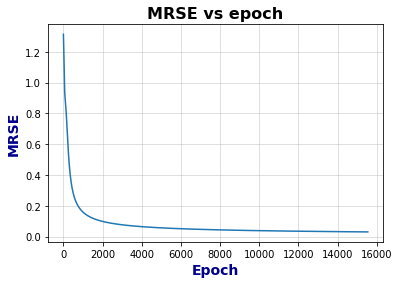

In [29]:
import matplotlib.pyplot as plt 
plt.plot(E[1:])
plt.grid(alpha=0.5)
plt.title('MRSE vs epoch',fontsize=16,fontweight='bold')
plt.ylabel('MRSE',fontsize=14,fontweight='bold', color='darkblue')
plt.xlabel('Epoch',fontsize=14,fontweight='bold', color='darkblue')

plt.show()